##Face Shape Classification
Facial recognition and classification have become integral parts of various applications, including security systems, entertainment, and even personalized marketing. Understanding and categorizing face shapes can play a crucial role in enhancing these applications. The Face Shape Classification dataset provides a comprehensive collection of images to support research and development in this domain.

##About the Dataset
This dataset comprises a total of 5000 images of female celebrities from around the globe. The images are meticulously categorized according to five distinct face shapes: Heart, Oblong, Oval, Round, and Square. Each category contains 1000 images, ensuring a balanced representation of each face shape type

Link Dataset : https://www.kaggle.com/datasets/niten19/face-shape-dataset

Categories and Distribution:
* Heart: 1000 images
* Oblong: 1000 images
* Oval: 1000 images
* Round: 1000 images
* Square: 1000 images

Training and Testing Sets:
Each face shape category is divided into a training set and a testing set.
*  Training Set: 800 images per category
* Testing Set: 200 images per category

This balanced distribution allows for effective training and robust testing of machine learning models.

## Data Extraction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!mkdir -p /content/dataset

!unzip /content/drive/MyDrive/DatasetRaw/Square.zip -d /content
!unzip /content/drive/MyDrive/DatasetRaw/Heart.zip -d /content
!unzip /content/drive/MyDrive/DatasetRaw/Oblong.zip -d /content
!unzip /content/drive/MyDrive/DatasetRaw/Oval.zip -d /content
!unzip /content/drive/MyDrive/DatasetRaw/Round.zip -d /content

Mounted at /content/drive
Archive:  /content/drive/MyDrive/DatasetRaw/Heart.zip
   creating: /content/Heart/
  inflating: /content/Heart/heart (1).jpg  
  inflating: /content/Heart/heart (10).jpg  
  inflating: /content/Heart/heart (100).jpg  
  inflating: /content/Heart/heart (1000).jpg  
  inflating: /content/Heart/heart (103).jpg  
  inflating: /content/Heart/heart (104).jpg  
  inflating: /content/Heart/heart (105).jpg  
  inflating: /content/Heart/heart (106).jpg  
  inflating: /content/Heart/heart (107).jpg  
  inflating: /content/Heart/heart (108).jpg  
  inflating: /content/Heart/heart (109).jpg  
  inflating: /content/Heart/heart (11).jpg  
  inflating: /content/Heart/heart (110).jpg  
  inflating: /content/Heart/heart (111).jpg  
  inflating: /content/Heart/heart (112).jpg  
  inflating: /content/Heart/heart (113).jpg  
  inflating: /content/Heart/heart (114).jpg  
  inflating: /content/Heart/heart (115).jpg  
  inflating: /content/Heart/heart (116).jpg  
  inflating: /conten

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!unzip /content/drive/MyDrive/DatasetRaw/testing_set.zip -d /content

Mounted at /content/drive
Archive:  /content/drive/MyDrive/DatasetRaw/testing_set.zip
   creating: /content/testing_set/
   creating: /content/testing_set/Heart/
  inflating: /content/testing_set/Heart/heart (101).jpg  
  inflating: /content/testing_set/Heart/heart (102).jpg  
  inflating: /content/testing_set/Heart/heart (123).jpg  
  inflating: /content/testing_set/Heart/heart (13).jpg  
  inflating: /content/testing_set/Heart/heart (135).jpg  
  inflating: /content/testing_set/Heart/heart (136).jpg  
  inflating: /content/testing_set/Heart/heart (137).jpg  
  inflating: /content/testing_set/Heart/heart (138).jpg  
  inflating: /content/testing_set/Heart/heart (139).jpg  
  inflating: /content/testing_set/Heart/heart (140).jpg  
  inflating: /content/testing_set/Heart/heart (141).jpg  
  inflating: /content/testing_set/Heart/heart (156).jpg  
  inflating: /content/testing_set/Heart/heart (161).jpg  
  inflating: /content/testing_set/Heart/heart (163).jpg  
  inflating: /content/testi

## Implementation MTCNN on Dataset

In [ ]:
import os
import cv2
import numpy as np
from mtcnn import MTCNN
import zipfile

# Fungsi untuk membuat bounding box menjadi persegi
def make_square(bbox):
    x, y, width, height = bbox
    if width != height:
        max_side = max(width, height)
        x_center = x + width // 2
        y_center = y + height // 2
        x = max(0, x_center - max_side // 2)
        y = max(0, y_center - max_side // 2)
        width = height = max_side
    return x, y, width, height

# Fungsi untuk menambahkan padding dan resize wajah
def add_padding_and_resize(bbox, img, output_size=(229, 229), padding_ratio=0.09):
    x, y, width, height = make_square(bbox)
    padding = int(height * padding_ratio)

    y1 = y
    y2 = y + height
    if y2 + padding > img.shape[0]:
        y1 = max(0, y1 - (y2 + padding - img.shape[0]))

    face = img[y1:y2+padding, x:x+width]

    face_resized = cv2.resize(face, output_size)

    return face_resized

# Fungsi untuk mendeteksi dan meresize wajah pada gambar
def detect_and_resize_faces(image_path, output_dir, output_size=(229, 229), padding_ratio=0.09):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error loading image {image_path}")
        return None

    detector = MTCNN()
    detections = detector.detect_faces(image)

    if detections:
        for i, detection in enumerate(detections):
            face_resized = add_padding_and_resize(detection['box'], image, output_size, padding_ratio)
            output_path = os.path.join(output_dir, f"face_{i+1}_{os.path.basename(image_path)}")
            cv2.imwrite(output_path, face_resized)
        print(f"{len(detections)} face(s) detected, resized, and saved successfully in {image_path}!")
    else:
        print(f"No faces detected in the image {image_path}.")

# Direktori input (gambar)
input_dir = '/content/testing_set'

# Direktori output (hasil deteksi dan resize wajah)
output_root_dir = '/content/resizing_testing'
os.makedirs(output_root_dir, exist_ok=True)

# List folder yang ada di direktori input
folders = os.listdir(input_dir)

# Iterasi melalui setiap folder di dalam direktori input
for folder in folders:
    folder_path = os.path.join(input_dir, folder)
    # Memproses semua gambar yang ada di dalam folder
    for image_file in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_file)
        output_dir = os.path.join(output_root_dir, folder)
        os.makedirs(output_dir, exist_ok=True)
        # Memanggil fungsi untuk mendeteksi dan meresize wajah pada gambar
        detect_and_resize_faces(image_path, output_dir)

# Kompres hasil deteksi dan resize wajah menjadi zip
output_zip = '/content/resizing_testing.zip'
with zipfile.ZipFile(output_zip, 'w') as zipf:
    for root, dirs, files in os.walk(output_root_dir):
        for file in files:
            file_path = os.path.join(root, file)
            arcname = os.path.relpath(file_path, output_root_dir)
            zipf.write(file_path, arcname)

print(f"Hasil deteksi dan resize wajah telah dikompresi menjadi {output_zip}")

1/1 [==============================] - 0s 488ms/step
1 face(s) detected, resized, and saved successfully in /content/testing_set/Oblong/oblong (901).jpg!
1/1 [==============================] - 0s 498ms/step


1/1 [==============================] - 0s 356ms/step
1 face(s) detected, resized, and saved successfully in /content/testing_set/Oblong/oblong (664).jpg!
1/1 [==============================] - 0s 294ms/step


Output streaming akan dipotong hingga 5000 baris terakhir.
1/1 [==============================] - 0s 153ms/step
1 face(s) detected, resized, and saved successfully in /content/testing_set/Round/round (438).jpg!
1/1 [==============================] - 0s 233ms/step
1 face(s) detected, resized, and saved successfully in /content/testing_set/Round/round (373).jpg!
1/1 [==============================] - 0s 130ms/step
1 face(s) detected, resized, and saved successfully in /content/testing_set/Round/round (24).jpg!
1/1 [==============================] - 0s 132ms/step
1 face(s) detected, resized, and saved successfully in /content/testing_set/Round/round (213).jpg!
1/1 [==============================] - 0s 162ms/step
1 face(s) detected, resized, and saved successfully in /content/testing_set/Round/round (96).jpg!
1/1 [==============================] - 0s 144ms/step
1 face(s) detected, resized, and saved successfully in /content/testing_set/Round/round (988).jpg!
1/1 [==========================

## Extraction of New Face Shape Dataset Results Using MTCNN

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Buat direktori untuk menyimpan file yang diekstrak
!mkdir -p /content/Dataset/Training

# Ekstrak file zip dari Google Drive ke direktori kerja
!unzip /content/drive/MyDrive/Dataset/Training_new.zip -d /content/Dataset/Training

Mounted at /content/drive
Archive:  /content/drive/MyDrive/Dataset/Training_new.zip
   creating: /content/Dataset/Training/Square/
  inflating: /content/Dataset/Training/Square/face_1_square (10).jpg  
  inflating: /content/Dataset/Training/Square/face_1_square (100).jpg  
  inflating: /content/Dataset/Training/Square/face_1_square (1000).jpg  
  inflating: /content/Dataset/Training/Square/face_1_square (101).jpg  
  inflating: /content/Dataset/Training/Square/face_1_square (102).jpg  
  inflating: /content/Dataset/Training/Square/face_1_square (103).jpg  
  inflating: /content/Dataset/Training/Square/face_1_square (104).jpg  
  inflating: /content/Dataset/Training/Square/face_1_square (105).jpg  
  inflating: /content/Dataset/Training/Square/face_1_square (106).jpg  
  inflating: /content/Dataset/Training/Square/face_1_square (107).jpg  
  inflating: /content/Dataset/Training/Square/face_1_square (108).jpg  
  inflating: /content/Dataset/Training/Square/face_1_square (109).jpg  
  inf

In [ ]:
# Buat direktori untuk menyimpan file yang diekstrak
!mkdir -p /content/Dataset/Testing

# Ekstrak file zip dari Google Drive ke direktori kerja
!unzip /content/drive/MyDrive/Dataset/Testing_new.zip -d /content/Dataset/Testing

Archive:  /content/drive/MyDrive/Dataset/Testing_new.zip
   creating: /content/Dataset/Testing/resizing_testing/
   creating: /content/Dataset/Testing/resizing_testing/Heart/
  inflating: /content/Dataset/Testing/resizing_testing/Heart/face_1_heart (101).jpg  
  inflating: /content/Dataset/Testing/resizing_testing/Heart/face_1_heart (102).jpg  
  inflating: /content/Dataset/Testing/resizing_testing/Heart/face_1_heart (123).jpg  
  inflating: /content/Dataset/Testing/resizing_testing/Heart/face_1_heart (13).jpg  
  inflating: /content/Dataset/Testing/resizing_testing/Heart/face_1_heart (135).jpg  
  inflating: /content/Dataset/Testing/resizing_testing/Heart/face_1_heart (136).jpg  
  inflating: /content/Dataset/Testing/resizing_testing/Heart/face_1_heart (137).jpg  
  inflating: /content/Dataset/Testing/resizing_testing/Heart/face_1_heart (138).jpg  
  inflating: /content/Dataset/Testing/resizing_testing/Heart/face_1_heart (139).jpg  
  inflating: /content/Dataset/Testing/resizing_testi

## Preview Results of Images from the Face Shape Dataset Using MTCNN

Found 3971 images belonging to 5 classes.


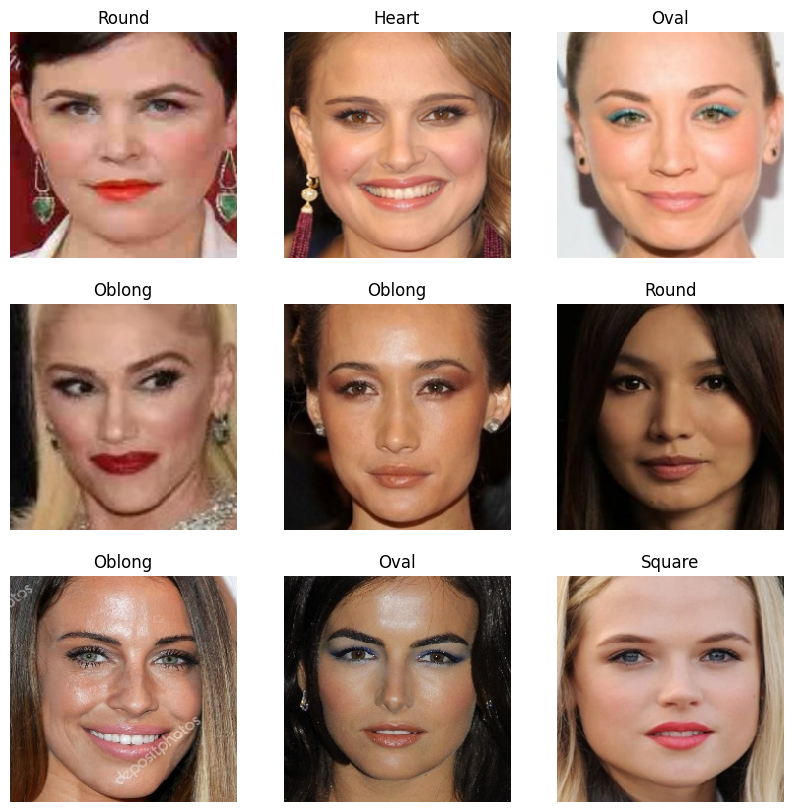

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path dataset
train_dir = '/content/Dataset/Training'

# Parameter model
img_width, img_height = 224, 224
batch_size = 32

# ImageDataGenerator tanpa augmentasi, hanya rescale
train_datagen = ImageDataGenerator(
    rescale=1./255
)

# Generator untuk training set tanpa augmentasi
train_dataset = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# Dapatkan nama kelas
class_names = list(train_dataset.class_indices.keys())

# Menampilkan beberapa gambar dari dataset beserta nama kelasnya
plt.figure(figsize=(10, 10))
for images, labels in train_dataset:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis("off")
    break

##Architecture Configuration

In [1]:
from tensorflow.keras.applications import MobileNet

# Load MobileNet model without the top layer
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Print model summary
base_model.summary()

17225924/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                 

## Pipeline Code for Face Shape Classification Using MobileNet Model

The following pipeline describes the process of building, training, and evaluating a face shape classification model using the MobileNet architecture. This pipeline leverages Keras and TensorFlow to preprocess data, augment images, build a customized model, and visualize results.

Steps
* **Import Libraries**: Import necessary libraries including TensorFlow, Keras, numpy, and others required for image processing, model building, and evaluation.

* **Set Dataset Paths**: Define the paths for the training and testing datasets.
Set Model Parameters: Specify image dimensions, batch size, number of epochs, and number of classes.
* **Data Augmentation**: Create data generators for the training and testing sets to rescale images and apply augmentations like horizontal flip and nearest fill mode.
* **Generate Data Batches**: Configure the data generators to read images from the specified directories and prepare batches for training and validation.
* **Load MobileNet Model**: Load the pre-trained MobileNet model without the top layer and add custom layers including GlobalAveragePooling, Dense, and Dropout for classification.
* **Compile the Model**: Freeze the base layers of MobileNet and compile the model with the RMSprop optimizer and categorical crossentropy loss.
* **Define Callbacks**: Set up callbacks including ModelCheckpoint to save the best model and EarlyStopping to halt training if validation accuracy doesn't improve.
* **Train the Model**: Train the model using the training data generator, validating against the validation data generator, and employing the defined callbacks.
* **Load Best Model**: Load the best model weights saved during training.
* **Evaluate the Model**: Make predictions on the validation set, compute the classification report, and generate the confusion matrix.
* **Visualize Training History**: Plot the training and validation accuracy and loss over epochs to visualize the training progress.
* **Visualize Confusion Matrix**: Plot the confusion matrix to understand the model's performance across different classes.
* **Preprocess Image for Prediction**: Define a function to preprocess images, including resizing and scaling.
* **Prediction Function**: Implement a function to predict the face shape of a given image using the trained model.
* **Example Prediction**: Use the prediction function to classify a sample image and print the predicted face shape.

Found 3971 images belonging to 5 classes.
Found 995 images belonging to 5 classes.
17225924/17225924 [==============================] - 0s 0us/step
Epoch 1/60
124/124 [==============================] - ETA: 0s - loss: 1.8816 - accuracy: 0.3280
Epoch 1: val_accuracy improved from -inf to 0.35988, saving model to best_model.h5
124/124 [==============================] - 58s 404ms/step - loss: 1.8816 - accuracy: 0.3280 - val_loss: 1.4546 - val_accuracy: 0.3599
Epoch 2/60


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


124/124 [==============================] - ETA: 0s - loss: 1.3731 - accuracy: 0.4260
Epoch 2: val_accuracy improved from 0.35988 to 0.40827, saving model to best_model.h5
124/124 [==============================] - 51s 416ms/step - loss: 1.3731 - accuracy: 0.4260 - val_loss: 1.4040 - val_accuracy: 0.4083
Epoch 3/60
124/124 [==============================] - ETA: 0s - loss: 1.2947 - accuracy: 0.4702
Epoch 3: val_accuracy improved from 0.40827 to 0.50504, saving model to best_model.h5
124/124 [==============================] - 52s 424ms/step - loss: 1.2947 - accuracy: 0.4702 - val_loss: 1.2249 - val_accuracy: 0.5050
Epoch 4/60
124/124 [==============================] - ETA: 0s - loss: 1.2176 - accuracy: 0.5090
Epoch 4: val_accuracy improved from 0.50504 to 0.53831, saving model to best_model.h5
124/124 [==============================] - 55s 440ms/step - loss: 1.2176 - accuracy: 0.5090 - val_loss: 1.1652 - val_accuracy: 0.5383
Epoch 5/60
124/124 [==============================] - ETA: 0s -

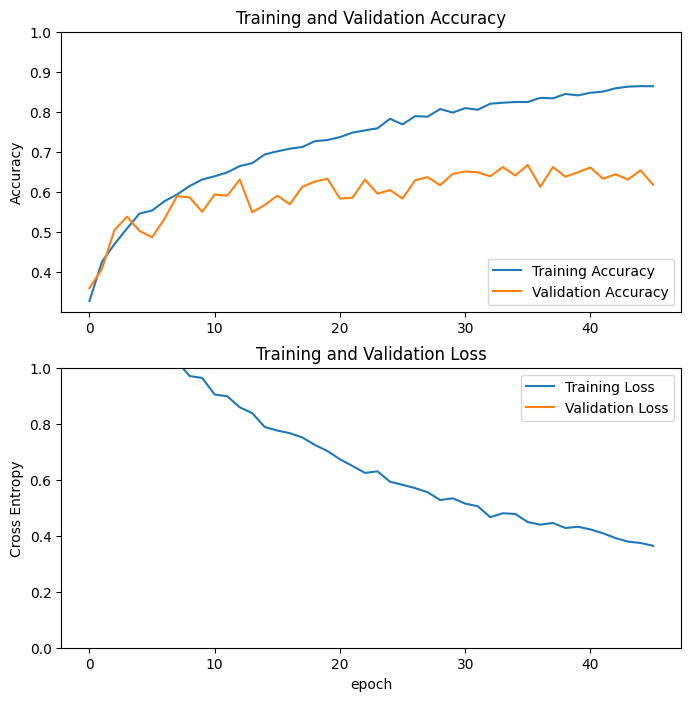

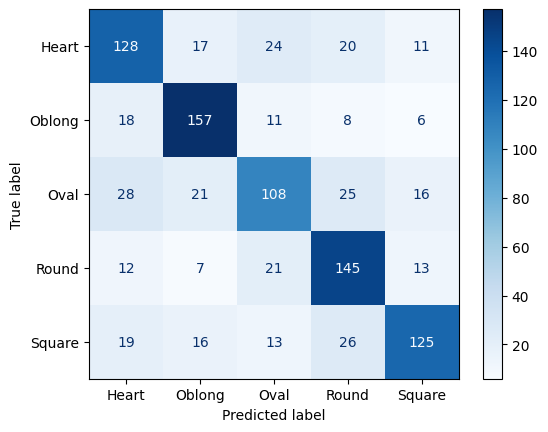

1/1 [==============================] - 1s 1s/step
The predicted face shape is: Round


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

# Path dataset
train_dir = '/content/Dataset/Training'
test_dir = '/content/Dataset/Testing/resizing_testing'

# Parameter model
img_width, img_height = 224, 224
batch_size = 32
epochs = 100
num_classes = 5

# Data augmentation training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data augmentation testing set
test_datagen = ImageDataGenerator(rescale=1./255)

# Generator training set
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# Generator testing set
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Load model MobileNet
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
optimizer = RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, mode='max')

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs,
    callbacks=[checkpoint, early_stop]
)

# Load best model
model.load_weights('best_model.h5')

# Model Evaluation
validation_generator.reset()
predictions = model.predict(validation_generator, steps=validation_generator.samples // batch_size + 1)
y_pred = np.argmax(predictions, axis=1)
y_true = validation_generator.classes

print('Classification Report')
print(classification_report(y_true, y_pred, target_names=validation_generator.class_indices.keys()))

# Confusion matrix
print('Confusion Matrix')
print(confusion_matrix(y_true, y_pred))

# Visualize training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()), 1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0, 1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# Confusion Matrix Visualization
cm = confusion_matrix(y_true, y_pred)
class_names = list(validation_generator.class_indices.keys())

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Preprocess image function
def preprocess_image(image_path, target_size):
    img = Image.open(image_path)
    # Proportional resize with padding
    img = ImageOps.fit(img, target_size, Image.LANCZOS)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    return img_array

# Prediction Function
def predict_face_shape(image_path):
    img_array = preprocess_image(image_path, (img_width, img_height))
    prediction = model.predict(img_array)
    class_idx = np.argmax(prediction, axis=1)[0]
    class_label = list(train_generator.class_indices.keys())[class_idx]
    return class_label

# Example for Prediction
image_path = '/content/Dataset/Testing/resizing_testing/Heart/face_1_heart (101).jpg'
face_shape = predict_face_shape(image_path)
print(f'The predicted face shape is: {face_shape}')

## Fine Tuning MobileNet Model

**Make the Base Model Trainable:**

* Unfreeze all layers of the base MobileNet model by setting them to be trainable. This allows the weights of these layers to be updated during training.

* Compile the Model with a Lower Learning Rate: Compile the model using the Adam optimizer with a reduced learning rate of 1e-4. This ensures that weight updates are small, preventing disruption of the pre-trained features.

**Define Callbacks:**
* EarlyStopping: Monitors validation loss, Stops training if the validation loss does not improve by at least 0.001 for 5 consecutive epochs, Restores the best weights observed during training.
* ReduceLROnPlateau: Monitors validation loss, Reduces learning rate by a factor of 0.1 if the validation loss does not improve for 2 epochs, Ensures the learning rate does not go below 1e-9.

**Model Checkpoint and EarlyStopping for Accuracy:**
* ModelCheckpoint: Saves the model weights with the highest validation accuracy during training, Ensures the best-performing model is retained.
* EarlyStopping for Accuracy: Monitors validation accuracy, Stops training if validation accuracy does not improve for 10 consecutive epochs, Prevents overfitting and saves computational resources.

**Train the Model:**
* Train the model using the specified generators and callbacks.
* Integrates the fine-tuning process, allowing the model to adapt to the new dataset while refining pre-trained weights for better performance in face shape classification.

Found 3971 images belonging to 5 classes.
Found 995 images belonging to 5 classes.
Epoch 1/50
62/62 [==============================] - ETA: 0s - loss: 1.4895 - accuracy: 0.3747
Epoch 1: val_accuracy improved from -inf to 0.28854, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


62/62 [==============================] - 83s 1s/step - loss: 1.4895 - accuracy: 0.3747 - val_loss: 2.0819 - val_accuracy: 0.2885 - lr: 1.0000e-04
Epoch 2/50
62/62 [==============================] - ETA: 0s - loss: 1.0490 - accuracy: 0.5828
Epoch 2: val_accuracy improved from 0.28854 to 0.38646, saving model to best_model.h5
62/62 [==============================] - 64s 1s/step - loss: 1.0490 - accuracy: 0.5828 - val_loss: 1.8897 - val_accuracy: 0.3865 - lr: 1.0000e-04
Epoch 3/50
62/62 [==============================] - ETA: 0s - loss: 0.8117 - accuracy: 0.6811
Epoch 3: val_accuracy improved from 0.38646 to 0.49375, saving model to best_model.h5
62/62 [==============================] - 67s 1s/step - loss: 0.8117 - accuracy: 0.6811 - val_loss: 1.3774 - val_accuracy: 0.4938 - lr: 1.0000e-04
Epoch 4/50
62/62 [==============================] - ETA: 0s - loss: 0.6313 - accuracy: 0.7576
Epoch 4: val_accuracy improved from 0.49375 to 0.66458, saving model to best_model.h5
62/62 [===============

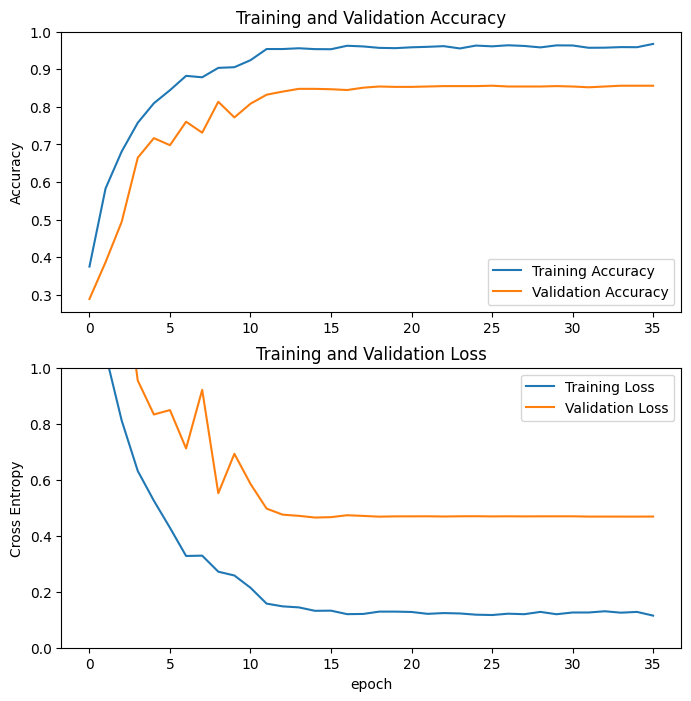

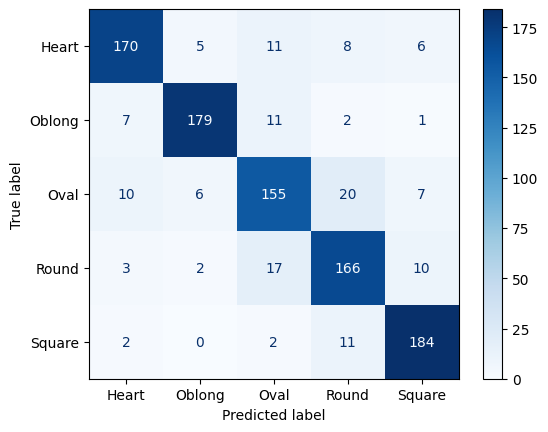

1/1 [==============================] - 0s 421ms/step
The predicted face shape is: Round


In [ ]:
# Path dataset
train_dir = '/content/Dataset/Training'
test_dir = '/content/Dataset/Testing/resizing_testing'

# Parameter model
img_width, img_height = 224, 224
batch_size = 64
epochs = 50
num_classes = 5

# Data augmentation training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    brightness_range=[0.9, 1.3],
    rotation_range=30,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data augmentation testing set
test_datagen = ImageDataGenerator(rescale=1./255)

# Generator training set
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# Generator testing set
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Load model MobileNet
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1536, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Make the base model trainable
for layer in base_model.layers:
    layer.trainable = True

# Compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Define the EarlyStopping and ReduceLROnPlateau callbacks
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=1e-9)

# Callbacks
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, mode='max')

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs,
    callbacks=[checkpoint, early_stop, reduce_lr]
)

# Load best model
model.load_weights('best_model.h5')

# Model Evaluation
validation_generator.reset()
predictions = model.predict(validation_generator, steps=validation_generator.samples // batch_size + 1)
y_pred = np.argmax(predictions, axis=1)
y_true = validation_generator.classes

print('Classification Report')
print(classification_report(y_true, y_pred, target_names=validation_generator.class_indices.keys()))

# Confusion matrix
print('Confusion Matrix')
print(confusion_matrix(y_true, y_pred))

# Visualize training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()), 1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0, 1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# Confusion Matrix Visualization
cm = confusion_matrix(y_true, y_pred)
class_names = list(validation_generator.class_indices.keys())

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Preprocess image function
def preprocess_image(image_path, target_size):
    img = Image.open(image_path)
    # Proportional resize with padding
    img = ImageOps.fit(img, target_size, Image.LANCZOS)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    return img_array

# Prediction Function
def predict_face_shape(image_path):
    img_array = preprocess_image(image_path, (img_width, img_height))
    prediction = model.predict(img_array)
    class_idx = np.argmax(prediction, axis=1)[0]
    class_label = list(train_generator.class_indices.keys())[class_idx]
    return class_label

# Example for Prediction
image_path = '/content/Dataset/Testing/resizing_testing/Oval/face_1_oval (140).jpg'
face_shape = predict_face_shape(image_path)
print(f'The predicted face shape is: {face_shape}')

##Convert Model Keras to Tensorflow Js

In [ ]:
pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 107.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 100.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 81.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 107.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 77.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 43.6 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
  

In [ ]:
!tensorflowjs_converter --input_format=keras best_model.h5 /content/model

2024-06-17 17:08:46.179770: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-17 17:08:47.205508: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Zipping Results Converted from Keras Model to TF.js

In [ ]:
import shutil
import os

# Path ke folder model yang telah dikonversi
model_folder = '/content/model'

# Path ke file zip hasil kompresi
zip_file = '/content/model.zip'

# Kompres folder model ke dalam file zip
shutil.make_archive(zip_file.replace('.zip', ''), 'zip', model_folder)

# Memastikan file zip telah terbuat
os.path.exists(zip_file)

True